<h1> TELECOM CHURN PREDICTION</h1> <BR>

Step 1: Importing  -Importing data and Standard Libraries <br>
Step 2: Data Cleaning and Vissualization  - Looking data for missing values, remove unrequired data, managing data-types and Visualizing data with graphs and Charts and looking for outliers<br>
Step 3: Preprocessing  - Standardizing and creating train test split <br>
Step 4: Data Modeling & Prediction  -Create different sets of base and ensemble models and comparing their performance

# <b>Step 1: Importing </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TelcomCustomer-Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()
# 3 neumeric features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# <b>Step 2: Data Cleaning and Analysing using Visualization </b>

In [ ]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
# Replacing objects with categorical data
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
# Function for analysing categorical features
def hist_value(feature):
    pd.value_counts(feature).plot.bar()
    plt.title(feature.name +  ' class histogram')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    print(feature.value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


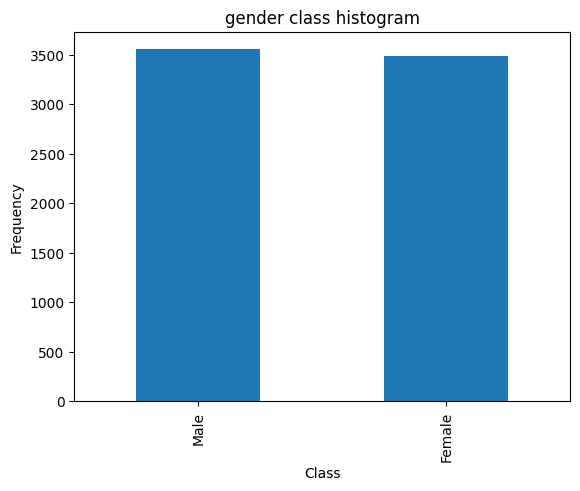

In [ ]:
hist_value(data['gender'])

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


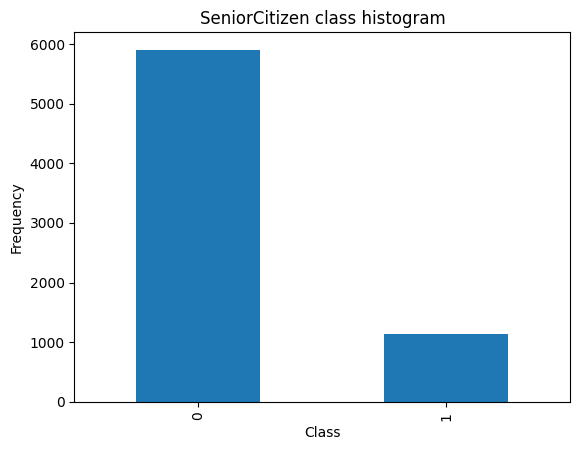

In [ ]:
hist_value(data['SeniorCitizen'])

Partner
No     3641
Yes    3402
Name: count, dtype: int64


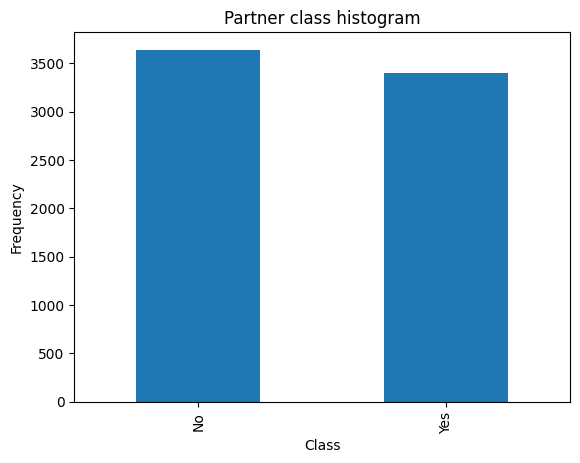

In [ ]:
hist_value(data['Partner'])

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


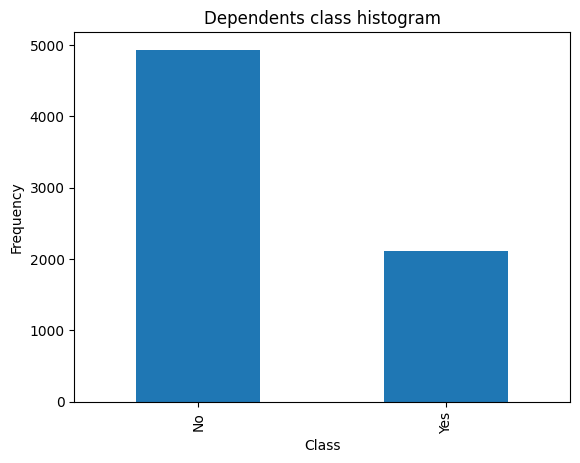

In [ ]:
hist_value(data['Dependents'])

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


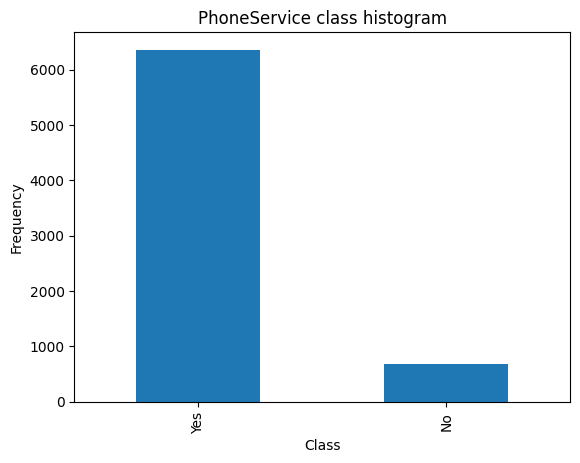

In [ ]:
hist_value(data['PhoneService'])

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


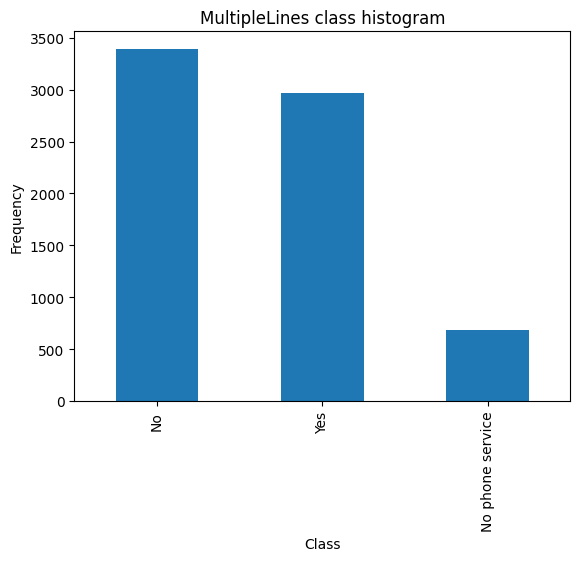

In [ ]:
hist_value(data['MultipleLines'])

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


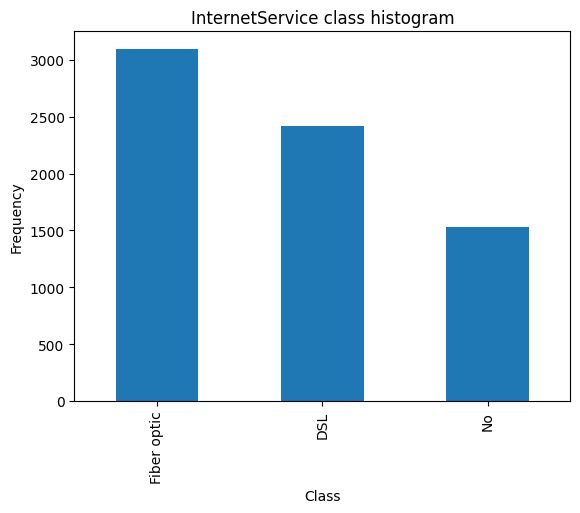

In [ ]:
hist_value(data['InternetService'])

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


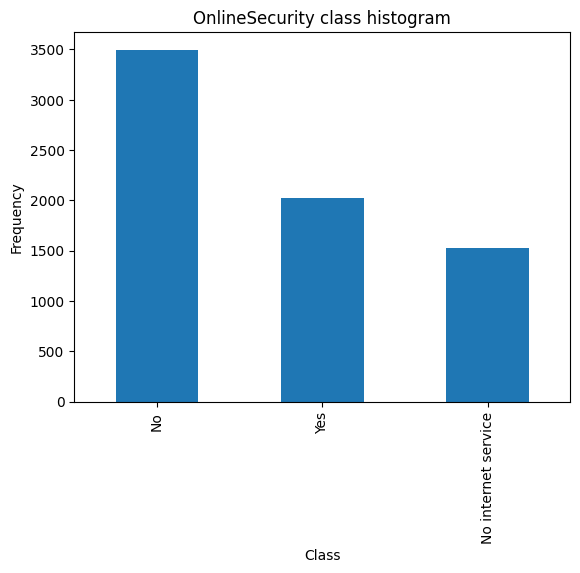

In [ ]:
hist_value(data['OnlineSecurity'])

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


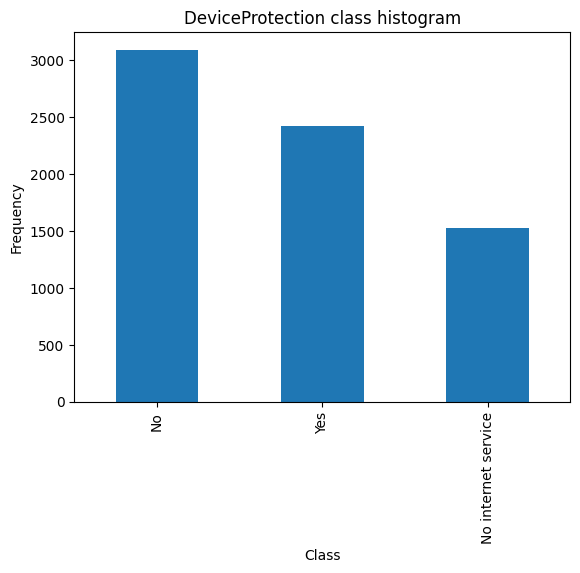

In [ ]:
hist_value(data['DeviceProtection'])

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


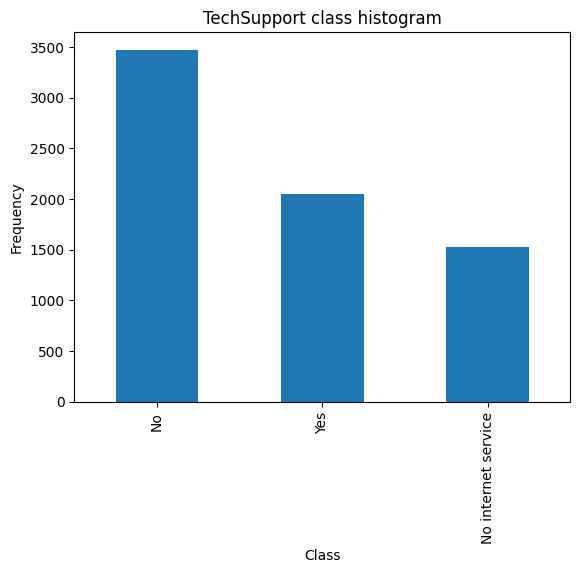

In [ ]:
hist_value(data['TechSupport'])

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


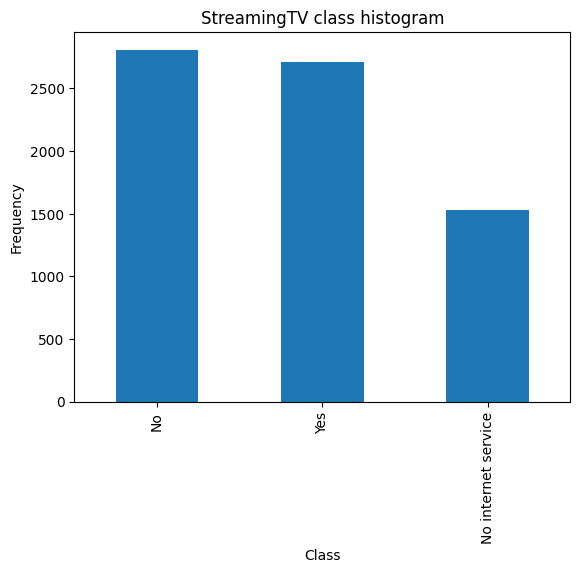

In [ ]:
hist_value(data['StreamingTV'])

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


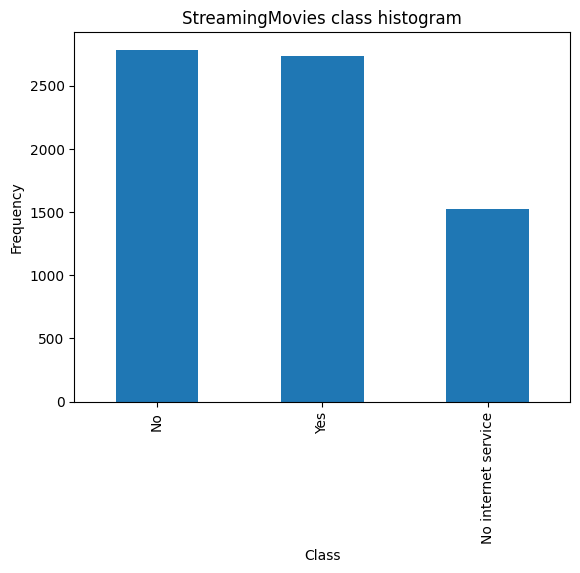

In [ ]:
hist_value(data['StreamingMovies'])

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


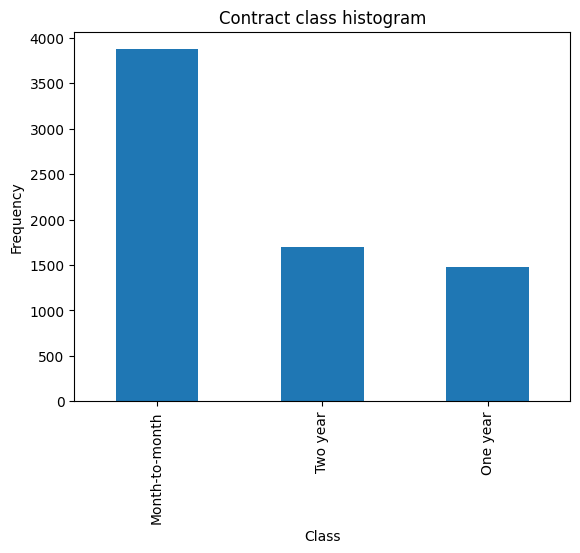

In [ ]:
hist_value(data['Contract'])

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


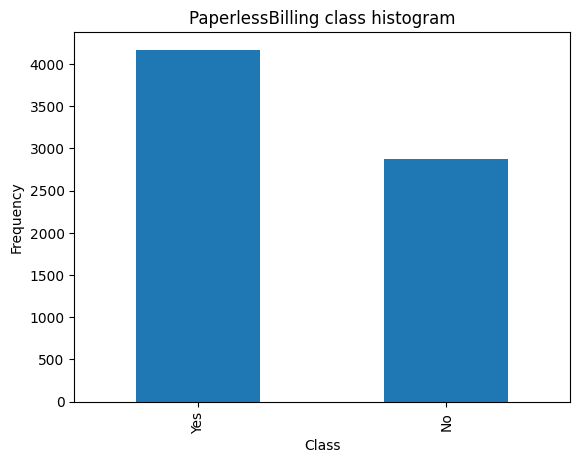

In [ ]:
hist_value(data['PaperlessBilling'])

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


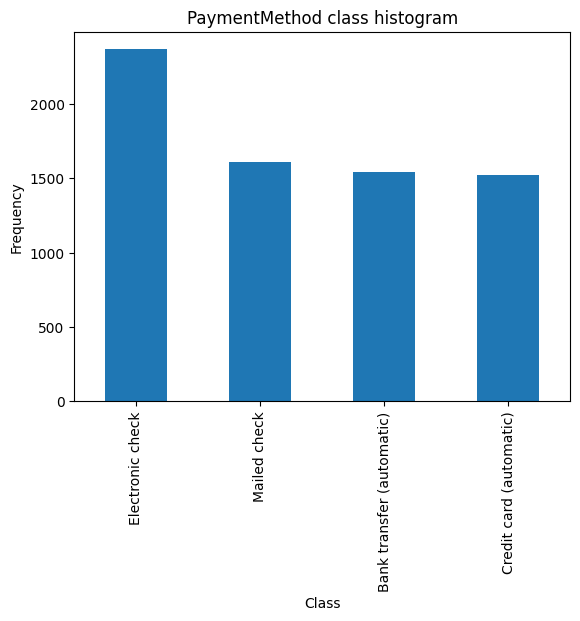

In [ ]:
hist_value(data['PaymentMethod'])

Churn
No     5174
Yes    1869
Name: count, dtype: int64


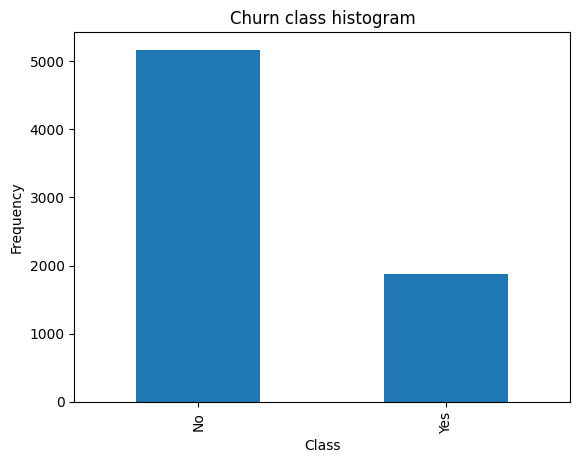

In [ ]:
hist_value(data['Churn'])

<p style="color:DodgerBlue; "><b> Observations from above plots :  </b><br> <br>
    <b>1: gender:- </b> Has almost equal ratios of Male and Female    <br>
    <b>2: SeniorCitizen:-</b>  Number of Senior Citizens are way less than normal citizens    <br>
    <b>3: Partner:-</b>  Has almost equal ratios of Partners and Non-Partners    <br>
    <b>4: Dependents:-</b>  Number of Dependent users are way less than Non-Dependent Users    <br>
    <b>5: PhoneService:-</b>  People who don't have Phone service are very few.    <br>
    <b>6: MultipleLines:-</b>  MultipleLines are fewer than normal lines and customers who do not have PhoneService do not belong to this category.     <br>
    <b>7: InternetService:-</b>  Fiber optic cable is most common interner service. There is large population which doesn't have internet service     <br>
    <b>8: OnlineSecurity:- </b>  OnlineSecurity is not opted by maximum customers and customers who do not have InternetService do not belong to any category.    <br>
    <b>9: DeviceProtection:- </b> DeviceProtection is not opted by maximum customers and customers who do not have InternetService do not belong to any category.   <br>
   <b>10: TechSupport:- </b> TechSupport is not taken by maximum customers and customers who do not have InternetService do not belong to any category.     <br>
    <b>11: StreamingTV:- </b> StreamingTV is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.   <br>
    <b>12: StreamingMovies:-</b>   StreamingMovies is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.   <br>
    <b>13: Contract:- </b>  Month t0 month contract is more likely opted by customers   <br>
    <b>14: PaperlessBilling:-</b>  Most customers have opted for PaperlessBilling   <br>
    <b>15: PaymentMethod:- </b> Electronic cheques is more preferred method of payment    <br>
    <b>16: Churn:- </b> This is our target variable with majority class being a Non-Churner. We would require to balance these before moving to model building !!    <br> <br><br> <br>
    
          

<h3> Group Based Analysis </h3>

In [ ]:
print('Male who Churned and Not Churned')
print(data.groupby(['gender']).get_group('Male').Churn.value_counts())
print('\n')
print('Female who Churned and Not Churned')
print(data.groupby(['gender']).get_group('Female').Churn.value_counts())

Male who Churned and Not Churned
Churn
No     2625
Yes     930
Name: count, dtype: int64


Female who Churned and Not Churned
Churn
No     2549
Yes     939
Name: count, dtype: int64


In [ ]:
print('Non-Senior Citizens who Churned and Not Churned')
print(data.groupby(['SeniorCitizen']).get_group(0).Churn.value_counts())
print('\n')
print('Senior Citizens who Churned and Not Churned')
print(data.groupby(['SeniorCitizen']).get_group(1).Churn.value_counts())

Non-Senior Citizens who Churned and Not Churned
Churn
No     4508
Yes    1393
Name: count, dtype: int64


Senior Citizens who Churned and Not Churned
Churn
No     666
Yes    476
Name: count, dtype: int64


In [ ]:
print('Partner who Churned and Not Churned')
print(data.groupby(['Partner']).get_group('Yes').Churn.value_counts())
print('\n')
print('Non-Partner who Churned and Not Churned')
print(data.groupby(['Partner']).get_group('No').Churn.value_counts())

Partner who Churned and Not Churned
Churn
No     2733
Yes     669
Name: count, dtype: int64


Non-Partner who Churned and Not Churned
Churn
No     2441
Yes    1200
Name: count, dtype: int64


In [ ]:
print('Dependents who Churned and Not Churned')
print(data.groupby(['Dependents']).get_group('Yes').Churn.value_counts())
print('\n')
print('Non-Dependents who Churned and Not Churned')
print(data.groupby(['Dependents']).get_group('No').Churn.value_counts())

Dependents who Churned and Not Churned
Churn
No     1784
Yes     326
Name: count, dtype: int64


Non-Dependents who Churned and Not Churned
Churn
No     3390
Yes    1543
Name: count, dtype: int64


In [ ]:
print('Customer with PhoneService who Churned and Not Churned')
print(data.groupby(['PhoneService']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No PhoneService who Churned and Not Churned')
print(data.groupby(['PhoneService']).get_group('No').Churn.value_counts())

Customer with PhoneService who Churned and Not Churned
Churn
No     4662
Yes    1699
Name: count, dtype: int64


Customer with No PhoneService who Churned and Not Churned
Churn
No     512
Yes    170
Name: count, dtype: int64


In [ ]:
print('Customer with MultipleLines who Churned and Not Churned')
print(data.groupby(['MultipleLines']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No MultipleLines who Churned and Not Churned')
print(data.groupby(['MultipleLines']).get_group('No').Churn.value_counts())
print('\n')
print('Customer with No PhoneService who Churned and Not Churned')
print(data.groupby(['MultipleLines']).get_group('No phone service').Churn.value_counts())

Customer with MultipleLines who Churned and Not Churned
Churn
No     2121
Yes     850
Name: count, dtype: int64


Customer with No MultipleLines who Churned and Not Churned
Churn
No     2541
Yes     849
Name: count, dtype: int64


Customer with No PhoneService who Churned and Not Churned
Churn
No     512
Yes    170
Name: count, dtype: int64


In [ ]:
print('Customer with DSL InternetService who Churned and Not Churned')
print(data.groupby(['InternetService']).get_group('DSL').Churn.value_counts())
print('\n')
print('Customer with Fiber optic InternetService who Churned and Not Churned')
print(data.groupby(['InternetService']).get_group('Fiber optic').Churn.value_counts())
print('\n')
print('Customer with No InternetService who Churned and Not Churned')
print(data.groupby(['InternetService']).get_group('No').Churn.value_counts())


Customer with DSL InternetService who Churned and Not Churned
Churn
No     1962
Yes     459
Name: count, dtype: int64


Customer with Fiber optic InternetService who Churned and Not Churned
Churn
No     1799
Yes    1297
Name: count, dtype: int64


Customer with No InternetService who Churned and Not Churned
Churn
No     1413
Yes     113
Name: count, dtype: int64


In [ ]:
print('Customer with OnlineSecurity who Churned and Not Churned')
print(data.groupby(['OnlineSecurity']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No OnlineSecurity who Churned and Not Churned')
print(data.groupby(['OnlineSecurity']).get_group('No').Churn.value_counts())

Customer with OnlineSecurity who Churned and Not Churned
Churn
No     1724
Yes     295
Name: count, dtype: int64


Customer with No OnlineSecurity who Churned and Not Churned
Churn
No     2037
Yes    1461
Name: count, dtype: int64


In [ ]:
print('Customer with DeviceProtection who Churned and Not Churned')
print(data.groupby(['DeviceProtection']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No DeviceProtection who Churned and Not Churned')
print(data.groupby(['DeviceProtection']).get_group('No').Churn.value_counts())

Customer with DeviceProtection who Churned and Not Churned
Churn
No     1877
Yes     545
Name: count, dtype: int64


Customer with No DeviceProtection who Churned and Not Churned
Churn
No     1884
Yes    1211
Name: count, dtype: int64


In [ ]:
print('Customer with TechSupport who Churned and Not Churned')
print(data.groupby(['TechSupport']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No TechSupport who Churned and Not Churned')
print(data.groupby(['TechSupport']).get_group('No').Churn.value_counts())

Customer with TechSupport who Churned and Not Churned
Churn
No     1734
Yes     310
Name: count, dtype: int64


Customer with No TechSupport who Churned and Not Churned
Churn
No     2027
Yes    1446
Name: count, dtype: int64


In [ ]:
print('Customer with StreamingTV Service who Churned and Not Churned')
print(data.groupby(['StreamingTV']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No StreamingTV Service who Churned and Not Churned')
print(data.groupby(['StreamingTV']).get_group('No').Churn.value_counts())

Customer with StreamingTV Service who Churned and Not Churned
Churn
No     1893
Yes     814
Name: count, dtype: int64


Customer with No StreamingTV Service who Churned and Not Churned
Churn
No     1868
Yes     942
Name: count, dtype: int64


In [ ]:
print('Customer with StreamingMovies Service who Churned and Not Churned')
print(data.groupby(['StreamingMovies']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No StreamingMovies who Churned and Not Churned')
print(data.groupby(['StreamingMovies']).get_group('No').Churn.value_counts())

Customer with StreamingMovies Service who Churned and Not Churned
Churn
No     1914
Yes     818
Name: count, dtype: int64


Customer with No StreamingMovies who Churned and Not Churned
Churn
No     1847
Yes     938
Name: count, dtype: int64


In [ ]:
print('Customer with Contract on Month-to-month basis who Churned and Not Churned')
print(data.groupby(['Contract']).get_group('Month-to-month').Churn.value_counts())
print('\n')
print('Customer with Contract of One year who Churned and Not Churned')
print(data.groupby(['Contract']).get_group('One year').Churn.value_counts())
print('\n')
print('Customer with Contract of Two year who Churned and Not Churned')
print(data.groupby(['Contract']).get_group('Two year').Churn.value_counts())

Customer with Contract on Month-to-month basis who Churned and Not Churned
Churn
No     2220
Yes    1655
Name: count, dtype: int64


Customer with Contract of One year who Churned and Not Churned
Churn
No     1307
Yes     166
Name: count, dtype: int64


Customer with Contract of Two year who Churned and Not Churned
Churn
No     1647
Yes      48
Name: count, dtype: int64


<h3> One Hot Encoding of our Categorical Variables </h3>


In [ ]:
replaceStruct = {"Churn":     {"No": 0, "Yes": 1 }  }
oneHotCols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
            ,"InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaperlessBilling","PaymentMethod"]

In [ ]:
replaced_data=data.replace(replaceStruct, inplace=True)
replaced_data=pd.get_dummies(data, columns=oneHotCols)
replaced_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.95,1889.5,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
replaced_data.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contr

In [ ]:
replaced_data.shape

(7043, 48)

In [ ]:
feature_with_blank = []
for feature in replaced_data.columns:
    if any(replaced_data[feature] == ' '):

        feature_with_blank.append(feature)
print(feature_with_blank)
# Only TotalCharges has blank spaces, rest are fine

['TotalCharges']


In [ ]:

replaced_data[replaced_data.TotalCharges == ' '].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

<p> We see that we have blank values for TotalCharges at above indices. We first replace it with Nan values and then proceed.

In [ ]:
replaced_data.replace(' ', np.nan, inplace=True)
print(replaced_data[replaced_data.TotalCharges == ' '].index)
print(replaced_data.TotalCharges.isna().value_counts())

Index([], dtype='int64')
TotalCharges
False    7032
True       11
Name: count, dtype: int64


In [ ]:
replaced_data.TotalCharges = pd.to_numeric(replaced_data.TotalCharges)
replaced_data.TotalCharges.dtype

dtype('float64')

<ipython-input-54-74e831d5c5fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2=sns.distplot(replaced_data[replaced_data.Churn==0][replaced_data.TotalCharges.name],color='green',label='Non-Churner')
<ipython-input-54-74e831d5c5fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(replaced_data[replaced_

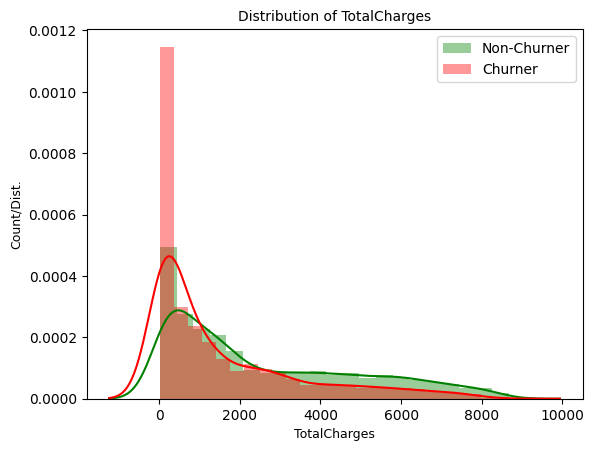

In [ ]:
plt2=sns.distplot(replaced_data[replaced_data.Churn==0][replaced_data.TotalCharges.name],color='green',label='Non-Churner')
sns.distplot(replaced_data[replaced_data.Churn==1][replaced_data.TotalCharges.name],color='red',label='Churner')
plt2.set_title('Distribution of '+ replaced_data.TotalCharges.name,fontdict={'fontsize':10})
plt2.set_xlabel(replaced_data.TotalCharges.name,fontdict={'fontsize':9})
plt2.set_ylabel('Count/Dist.',fontdict={'fontsize':9})
plt2.axes.legend(loc=0)

In [ ]:
median_df=replaced_data.groupby('Churn')['TotalCharges'].median()
median_df

Churn
0    1683.60
1     703.55
Name: TotalCharges, dtype: float64

<p style="color:DodgerBlue; "> Customers who do not churn have TotalCharges median value as 1683.60 which is way
    higher than people who churn. So update all missing values accordingly.
</p><br> <br>

In [ ]:
var_0=median_df.iloc[0]
var_1=median_df.iloc[1]
replaced_data.loc[(replaced_data['Churn'] == 0) & (replaced_data['TotalCharges'].isnull()), 'TotalCharges'] = var_0
replaced_data.loc[(replaced_data['Churn'] == 1) & (replaced_data['TotalCharges'].isnull()), 'TotalCharges'] = var_1
print(replaced_data.TotalCharges.isna().value_counts())

TotalCharges
False    7043
Name: count, dtype: int64


# <br>Step 3: Preprocessing <br>

<p style="color:DodgerBlue; ">Balancing data for Churn Label first using SMOTE, then standardize
    our data and finally move to model building part.
</p><br> <br>

In [ ]:
# Dropping customerID
replaced_data=replaced_data.drop('customerID',axis=1)
replaced_data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
# Seperating Churn
churn=replaced_data['Churn']
x=replaced_data.drop('Churn',axis=1)

Churn
0    5174
1    1869
Name: count, dtype: int64

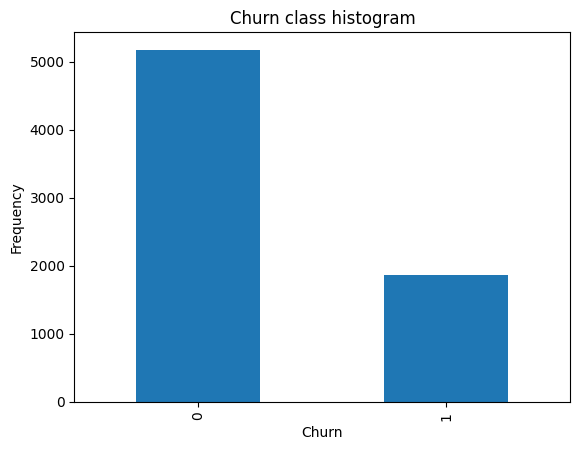

In [ ]:
# scatter plot of examples by class label
pd.value_counts(replaced_data['Churn']).plot.bar()
plt.title('Churn class histogram')
plt.xlabel('Churn')
plt.ylabel('Frequency')
replaced_data['Churn'].value_counts()

In [ ]:
# Train and test splits
# Synthetic minority oversampling technique(SMOTE)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(x, churn, test_size=0.2, random_state=0)

print("Number Observations in X_train dataset: ", X_train.shape)
print("Number Observations in y_train dataset: ", y_train.shape)
print("Number Observations in X_test dataset: ", X_test.shape)
print("Number Observations in y_test dataset: ", y_test.shape)

Number Observations in X_train dataset:  (5634, 46)
Number Observations in y_train dataset:  (5634,)
Number Observations in X_test dataset:  (1409, 46)
Number Observations in y_test dataset:  (1409,)


In [ ]:
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '0': 4133 

After OverSampling, the shape of train_X: (8266, 46)
After OverSampling, the shape of train_y: (8266,) 

After OverSampling, counts of label '1': 4133
After OverSampling, counts of label '0': 4133


We are just oversampling our train data and test data is still the same.

Text(0, 0.5, 'Frequency')

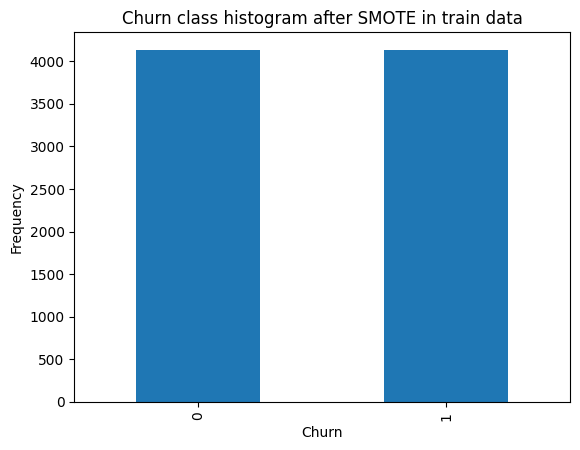

In [ ]:
# Resampled data after SMOTE
pd.value_counts(y_train_res).plot.bar()
plt.title('Churn class histogram after SMOTE in train data')
plt.xlabel('Churn')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

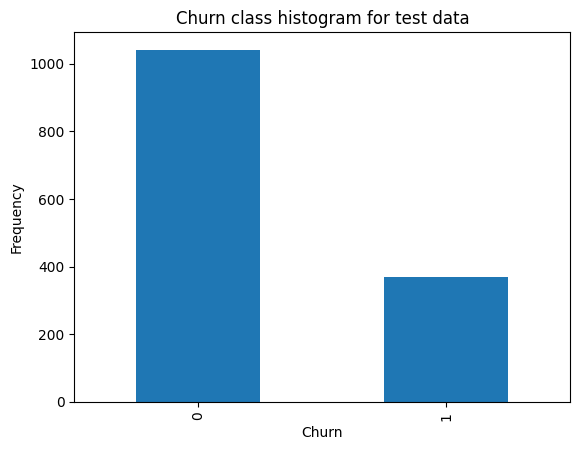

In [ ]:
pd.value_counts(y_test).plot.bar()
plt.title('Churn class histogram for test data')
plt.xlabel('Churn')
plt.ylabel('Frequency')

# Here we can see, data is still the same !!

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_train = StandardScaler().fit_transform(X_train_res)
scaled_test = StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train_res)
scaled_train = pd.DataFrame(scaler.transform(X_train_res))

scaler.fit(X_test)
scaled_test = pd.DataFrame(scaler.transform(X_test))



<p style="color:DodgerBlue; "> In this section we have successfully scaled our data and now we can proceed to data modeling part.
</p><br> <br> <br> <br>

<br><h2>Step 4: Data Modeling and Performance Evaluation <br> </h2>

<h3> Model 1  : Decision Trees </h3>

In [ ]:
from sklearn import tree

In [ ]:
clf_dt = tree.DecisionTreeClassifier(random_state=9)
clf_dt = clf_dt.fit(scaled_train, y_train_res)

[Text(0.290977127890386, 0.9814814814814815, 'x[37] <= 0.5\ngini = 0.5\nsamples = 8266\nvalue = [4133, 4133]'),
 Text(0.09775278006589785, 0.9444444444444444, 'x[17] <= 0.5\ngini = 0.184\nsamples = 2631\nvalue = [2361, 270]'),
 Text(0.056767033419628146, 0.9074074074074074, 'x[19] <= 0.5\ngini = 0.075\nsamples = 1762\nvalue = [1693, 69]'),
 Text(0.040914038597317015, 0.8703703703703703, 'x[44] <= 0.5\ngini = 0.049\nsamples = 1443\nvalue = [1407, 36]'),
 Text(0.026873970345963755, 0.8333333333333334, 'x[1] <= 0.738\ngini = 0.036\nsamples = 1321\nvalue = [1297, 24]'),
 Text(0.02050482466462697, 0.7962962962962963, 'x[1] <= 0.442\ngini = 0.034\nsamples = 1317\nvalue = [1294, 23]'),
 Text(0.010590727229936456, 0.7592592592592593, 'x[2] <= 0.002\ngini = 0.021\nsamples = 949\nvalue = [939, 10]'),
 Text(0.008707931277947752, 0.7222222222222222, 'x[2] <= 0.002\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.007766533301953401, 0.6851851851851852, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'

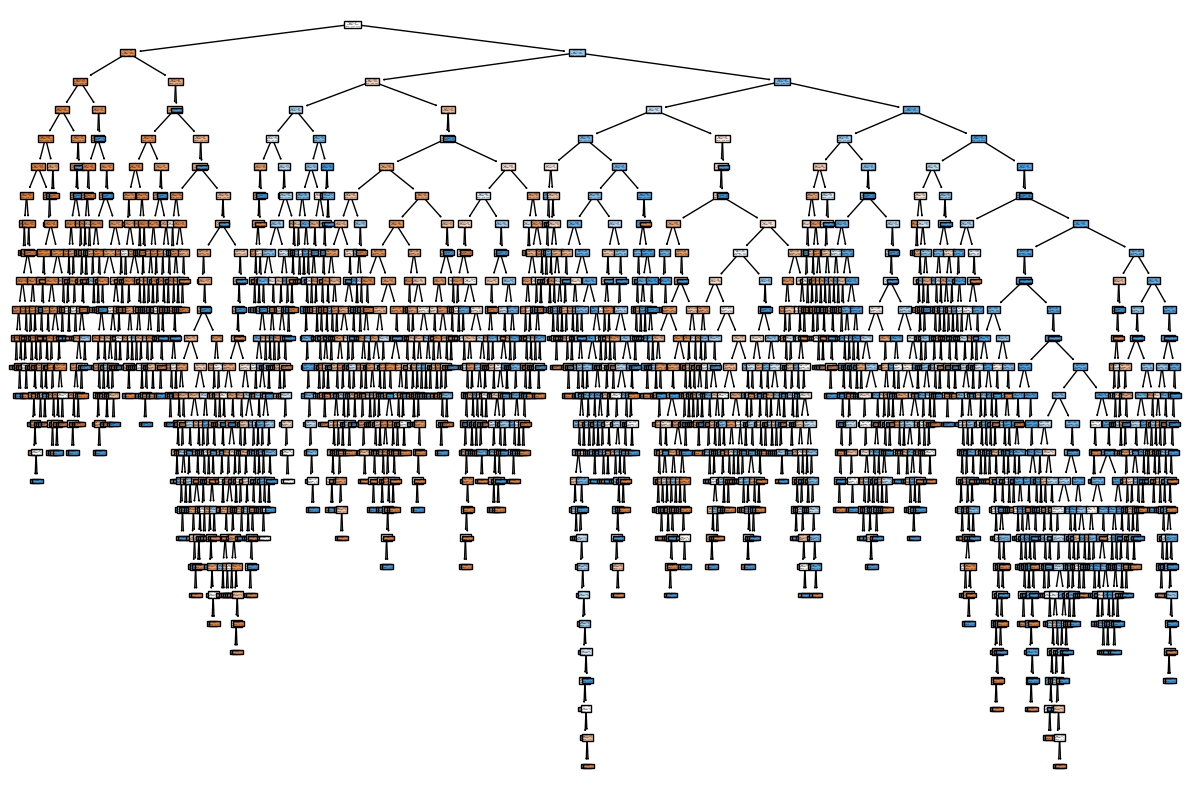

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(clf_dt, filled = True)

# below you can scroll and see a truly overfitted Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix
pred_dt_1=clf_dt.predict(scaled_train)
confusion_matrix(y_train_res,pred_dt_1)
pd.crosstab(y_train_res, pred_dt_1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4132,1,4133
1,13,4120,4133
All,4145,4121,8266


In [ ]:
pred_dt_2=clf_dt.predict(scaled_test)
confusion_matrix(y_test,pred_dt_2)
pd.crosstab(y_test, pred_dt_2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,837,204,1041
1,187,181,368
All,1024,385,1409


<br> <b>
<p style="color:DodgerBlue; "> This is a clear example of overfitting where we are just getting 14 mis-classified points for
    train data and for testing we have 611 mis-classified points
</p><br> <br></b>

In [ ]:
clf_dt = tree.DecisionTreeClassifier(random_state=9, max_depth=4)
clf_dt = clf_dt.fit(scaled_train, y_train_res)

[Text(0.49107142857142855, 0.9, 'x[37] <= 0.5\ngini = 0.5\nsamples = 8266\nvalue = [4133, 4133]'),
 Text(0.26785714285714285, 0.7, 'x[17] <= 0.5\ngini = 0.184\nsamples = 2631\nvalue = [2361, 270]'),
 Text(0.14285714285714285, 0.5, 'x[19] <= 0.5\ngini = 0.075\nsamples = 1762\nvalue = [1693, 69]'),
 Text(0.07142857142857142, 0.3, 'x[44] <= 0.5\ngini = 0.049\nsamples = 1443\nvalue = [1407, 36]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.036\nsamples = 1321\nvalue = [1297, 24]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.177\nsamples = 122\nvalue = [110, 12]'),
 Text(0.21428571428571427, 0.3, 'x[21] <= 0.5\ngini = 0.185\nsamples = 319\nvalue = [286, 33]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.158\nsamples = 313\nvalue = [286, 27]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.39285714285714285, 0.5, 'x[16] <= 0.5\ngini = 0.356\nsamples = 869\nvalue = [668, 201]'),
 Text(0.35714285714285715, 0.3, 'x[38] <= 0.5\ngini = 0.339\nsamples = 852\nvalue = [668, 184]')

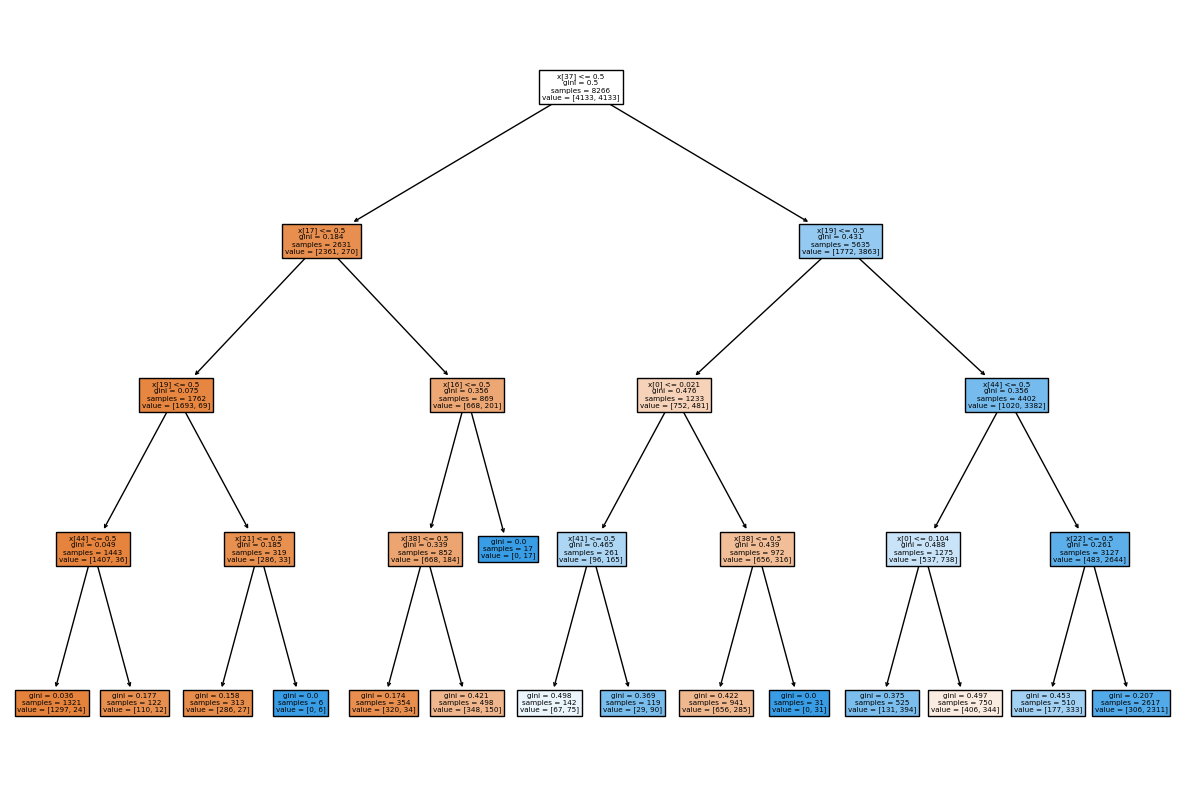

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(clf_dt, filled = True)

# below you can scroll and see a truly overfitted Decision Tree

In [ ]:
pred_dt_3=clf_dt.predict(scaled_train)
confusion_matrix(y_train_res,pred_dt_3)
pd.crosstab(y_train_res, pred_dt_3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3423,710,4133
1,876,3257,4133
All,4299,3967,8266


In [ ]:
pred_dt_4=clf_dt.predict(scaled_test)
confusion_matrix(y_test,pred_dt_4)
pd.crosstab(y_test, pred_dt_4, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,840,201,1041
1,145,223,368
All,985,424,1409


# <br> <b>
<p style="color:DodgerBlue; "> Here our model is making way too many mistakes in training set but in test set, we just have 568 points at depth = 4 which is better than our previous overfitted model. We can do rigorous hyper-parameter tuning and get good results !!
</p><br> <br><br></b>

<h3> Model 2  : K-Nearest Neighbors </h3>

In [ ]:
# Prediction for optimum k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=[]
accuracy=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    #fitting model with k=1,2,5....39 on x_train_knn
    knn.fit(scaled_train,y_train_res)
    #predicting on iris_cv
    pred=knn.predict(scaled_test)
    k.append(i)
    acc=accuracy_score(y_test,pred,normalize=True)*float(100)
    accuracy.append(acc)
    #Evaluationg Accuracy
    print("\n CV k,accuracy",(i,acc))
# For K=11 we are getting highest accuracy for train data. Also for K=3,5,9 are also worth looking into


 CV k,accuracy (1, 69.76579134137685)

 CV k,accuracy (3, 73.24343506032646)

 CV k,accuracy (5, 74.30801987224982)

 CV k,accuracy (7, 74.73385379701917)

 CV k,accuracy (9, 75.1596877217885)

 CV k,accuracy (11, 75.44357700496806)

 CV k,accuracy (13, 75.37260468417317)

 CV k,accuracy (15, 75.51454932576294)

 CV k,accuracy (17, 75.72746628814762)

 CV k,accuracy (19, 75.94038325053229)

 CV k,accuracy (21, 75.7984386089425)

 CV k,accuracy (23, 75.58552164655784)

 CV k,accuracy (25, 75.37260468417317)

 CV k,accuracy (27, 75.01774308019871)

 CV k,accuracy (29, 74.94677075940383)

 CV k,accuracy (31, 74.94677075940383)

 CV k,accuracy (33, 74.80482611781405)

 CV k,accuracy (35, 74.66288147622427)

 CV k,accuracy (37, 74.59190915542938)

 CV k,accuracy (39, 74.73385379701917)


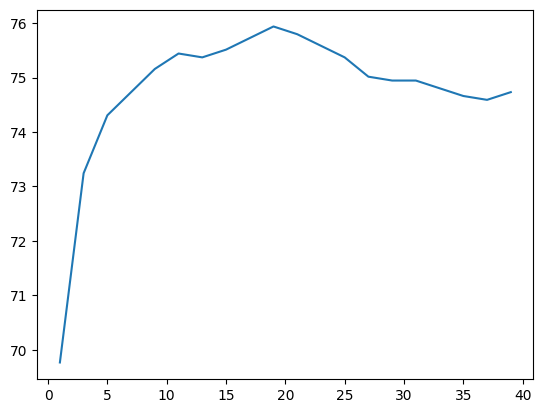

In [ ]:
plt.plot(k,accuracy)
# for k =19,17 we are getting good scores on test data

In [ ]:
#let us get the predictions using the classifier we had fit above
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(scaled_train,y_train_res)
pred=knn.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,843,198,1041
1,141,227,368
All,984,425,1409


In [ ]:
#let us get the predictions using the classifier we had fit above
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(scaled_train,y_train_res)
pred=knn.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,838,203,1041
1,142,226,368
All,980,429,1409


<p style="color:DodgerBlue; "> We have equal rates of mis-classified points for both 19 and 17 NN i.e. 340 points which is overall performing better than our underfit decision tree with depth=4.
    <br><br>
    One thing to observe is that 19-NN model is giving low errors on predicting Churner which might be preferred
</p><br> <br><br></b>

<h3> Model 3  : Logistic Regression </h3>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': np.linspace(0.001, 0.1, 1, 10)
             }
lr = LogisticRegression(random_state=9, max_iter=500)
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(scaled_train, y_train_res.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=9),
             n_jobs=3, param_grid={'C': array([0.001])}, verbose=5)

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
lr1 = LogisticRegression(C=0.001,penalty='l2', verbose=5,random_state=9, max_iter=500)
lr1.fit(scaled_train, y_train_res.ravel())
# We are using Ridge Regression for this use case

LogisticRegression(C=0.001, max_iter=500, random_state=9, verbose=5)

In [ ]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,780,261,1041
1,98,270,368
All,878,531,1409


In [ ]:
lr1 = LogisticRegression(max_iter=500)
lr1.fit(scaled_train, y_train_res)

LogisticRegression(max_iter=500)

In [ ]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,916,125,1041
1,161,207,368
All,1077,332,1409


In [ ]:
lr1 = LogisticRegression(C=0.001,penalty='l2', random_state=9, max_iter=500)
lr1.fit(scaled_train, y_train_res.ravel())
# We are using Ridge Regression for this use case

LogisticRegression(C=0.001, max_iter=500, random_state=9)

In [ ]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

# For lower values of c, we are able to balance between predicting churners and non-churners

Predicted,0,1,All
True,,,
0,780,261,1041
1,98,270,368
All,878,531,1409


In [ ]:
lr1 = LogisticRegression(C=0.0005,penalty='l2', random_state=9, max_iter=500)
lr1.fit(scaled_train, y_train_res.ravel())
# We are using Ridge Regression for this use case

LogisticRegression(C=0.0005, max_iter=500, random_state=9)

In [ ]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

# For lower values of c, we are able to balance between predicting churners and non-churners

Predicted,0,1,All
True,,,
0,762,279,1041
1,93,275,368
All,855,554,1409


In [ ]:
lr1 = LogisticRegression(C=0.0001,penalty='l2', random_state=9, max_iter=500)
lr1.fit(scaled_train, y_train_res.ravel())
# We are using Ridge Regression for this use case

LogisticRegression(C=0.0001, max_iter=500, random_state=9)

In [ ]:
pred=lr1.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

# For lower values of c, we are able to balance between predicting churners and non-churners

Predicted,0,1,All
True,,,
0,724,317,1041
1,84,284,368
All,808,601,1409


<p style="color:DodgerBlue; "> For Basic LR model with 500 iterations we are getting best accuracy but
     model is not able to classify churners well and is not appropriate.
    <br><br>
    One thing to observe here is that low value of c is able to predict churners better !
</p><br> <br><br></b>

<h3> Model 4  : Support Vector Machine </h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
# fitting the model for grid search
grid.fit(scaled_train, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   6.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   5.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   6.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   6.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.660 total time=   6.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   2.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   2.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   2.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   2.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   4.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.743 total time=   4.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
# we are getting these as best parameters

SVC(C=1000, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(scaled_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)
pd.crosstab(y_test, grid_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,933,108,1041
1,166,202,368
All,1099,310,1409


<p style="color:DodgerBlue; ">  Even with best parameters after Grid Search, we are still getting very high mis-classification
    rate but again churners are being classified nicely.
    <br><br>
    <b> One thing is clear that we need some sophisticated algorithm with low variance which can classify our data.</b>
</p><br> <br><br></b>

<h3> Model 5  : Random Forest </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state = 9)
modelF = forest.fit(scaled_train, y_train_res)
pred = modelF.predict(scaled_test)

In [ ]:
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,906,135,1041
1,190,178,368
All,1096,313,1409


In [ ]:
forest2 = RandomForestClassifier(n_estimators=1000, oob_score = True, n_jobs = -1,random_state =9,
                                max_features = "auto", max_leaf_nodes = 7)

In [ ]:
modelF2 = forest2.fit(scaled_train, y_train_res)
pred2 = modelF2.predict(scaled_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
confusion_matrix(y_test,pred2)
pd.crosstab(y_test, pred2, rownames=['True'], colnames=['Predicted'], margins=True)

# As we increased number of estimators and max_leaf_nodes, we are starting to get better results.
# Total mis-classified points is 517 which is best till now.

Predicted,0,1,All
True,,,
0,803,238,1041
1,113,255,368
All,916,493,1409


In [ ]:
forest3 = RandomForestClassifier(n_estimators=1200, oob_score = True, n_jobs = -1,random_state =9,
                                max_features = "auto", max_leaf_nodes = 10)

In [ ]:
modelF3 = forest3.fit(scaled_train, y_train_res)
pred3 = modelF3.predict(scaled_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
confusion_matrix(y_test,pred3)
pd.crosstab(y_test, pred3, rownames=['True'], colnames=['Predicted'], margins=True)

# we are getting 338 miss-classified points

Predicted,0,1,All
True,,,
0,821,220,1041
1,118,250,368
All,939,470,1409


In [ ]:
forest4 = RandomForestClassifier(n_estimators=1000, oob_score = True, n_jobs = -1,random_state =9,
                                max_features = "log2", max_leaf_nodes = 7)

In [ ]:
modelF4 = forest4.fit(scaled_train, y_train_res)
pred4 = modelF4.predict(scaled_test)

In [ ]:
confusion_matrix(y_test,pred4)
pd.crosstab(y_test, pred4, rownames=['True'], colnames=['Predicted'], margins=True)

# we are getting 513 miss-classified points no. of churners are getting missed.

Predicted,0,1,All
True,,,
0,799,242,1041
1,111,257,368
All,910,499,1409


In [ ]:
forest5 = RandomForestClassifier(n_estimators=700, oob_score = True, n_jobs = -1,random_state = 9,
                                max_features = "auto", max_leaf_nodes = 7)

In [ ]:
modelF5 = forest5.fit(scaled_train, y_train_res)
pred5 = modelF5.predict(scaled_test)
confusion_matrix(y_test,pred5)
pd.crosstab(y_test, pred5, rownames=['True'], colnames=['Predicted'], margins=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Predicted,0,1,All
True,,,
0,805,236,1041
1,114,254,368
All,919,490,1409




<p style="color:DodgerBlue; ">  <b> There's a major problem that we are facing here. Number of features that we are
     considering here are too many and even some non-important features are also contributing to the model.
    Before moving forward, we'll be carrying feature importance and only keep top 30 predictors in our data.</b>
</p><br> <br><br></b>
<h3> Feature Importance Using Scikit-Learn </h3>

In [ ]:
importances = modelF5.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in modelF5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
features = X_train_res.columns

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_res.shape[1]):
    print("%d. feature %d (%f) and feature name : %s" % (f+1 , indices[f], importances[indices[f]], features[indices[f]]))

Feature ranking:
1. feature 37 (0.173125) and feature name : Contract_Month-to-month
2. feature 19 (0.128790) and feature name : OnlineSecurity_No
3. feature 28 (0.127034) and feature name : TechSupport_No
4. feature 44 (0.110553) and feature name : PaymentMethod_Electronic check
5. feature 0 (0.076585) and feature name : tenure
6. feature 22 (0.073158) and feature name : OnlineBackup_No
7. feature 17 (0.052455) and feature name : InternetService_Fiber optic
8. feature 25 (0.051956) and feature name : DeviceProtection_No
9. feature 2 (0.028854) and feature name : TotalCharges
10. feature 41 (0.026321) and feature name : PaperlessBilling_Yes
11. feature 39 (0.025442) and feature name : Contract_Two year
12. feature 7 (0.021919) and feature name : Partner_No
13. feature 9 (0.019120) and feature name : Dependents_No
14. feature 1 (0.007476) and feature name : MonthlyCharges
15. feature 32 (0.006490) and feature name : StreamingTV_No internet service
16. feature 6 (0.005890) and feature na

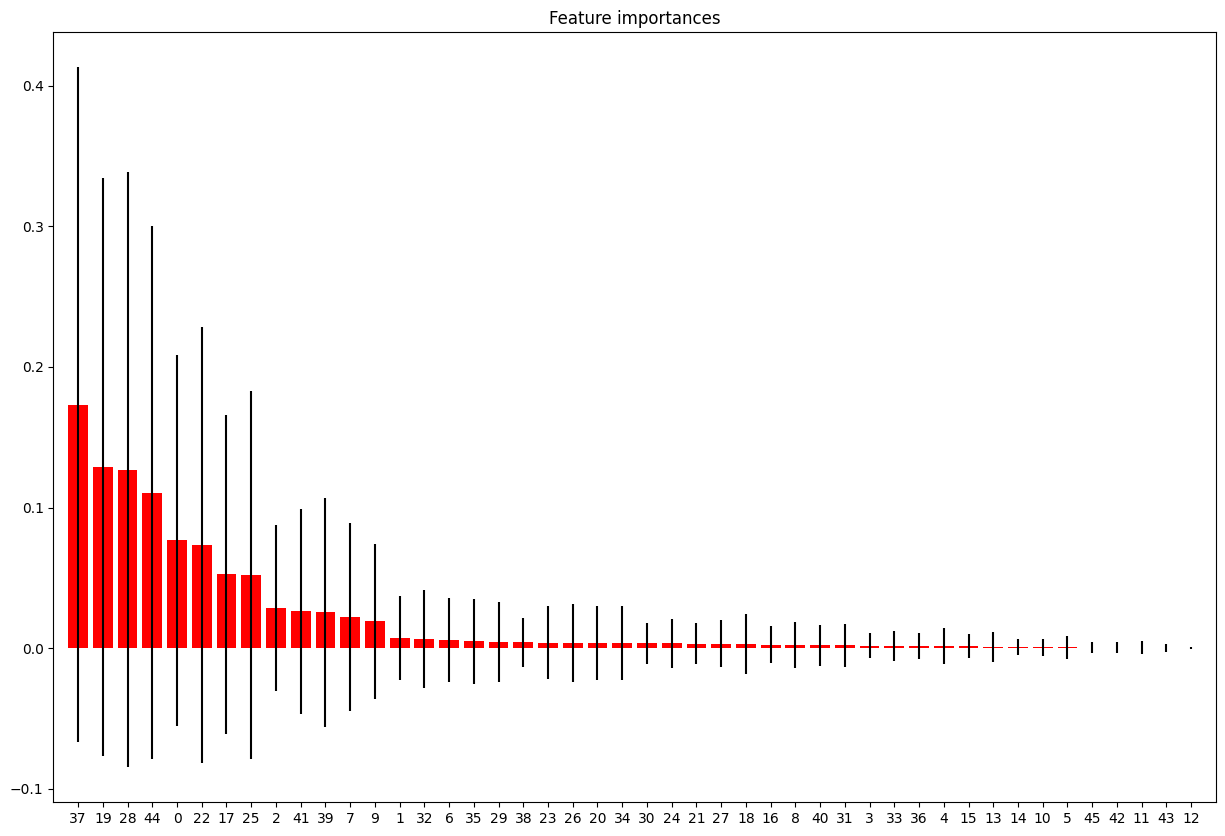

In [ ]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(X_train_res.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_res.shape[1]), indices)
plt.xlim([-1, X_train_res.shape[1]])
plt.show()

In [ ]:
# Subsetting X_train_res
top_30 = indices[:30]

In [ ]:
fe_train = X_train_res.iloc[:, top_30]
fe_train.shape

(8266, 30)

In [ ]:
# Similarly for test data
fe_test = X_test.iloc[:, top_30]
fe_test.shape

(1409, 30)

In [ ]:
# Scaling new data now
scaled_train_fe = StandardScaler().fit_transform(fe_train)
scaled_test_fe = StandardScaler().fit_transform(fe_test)

<h3> Back to Modeling </h3>

In [ ]:
forest6 = RandomForestClassifier(n_estimators=500, oob_score = True, n_jobs = -1,random_state = 9,
                                max_features = "auto", max_leaf_nodes = 6)

modelF6 = forest6.fit(scaled_train_fe, y_train_res)
pred6 = modelF6.predict(scaled_test_fe)
confusion_matrix(y_test,pred6)
pd.crosstab(y_test, pred6, rownames=['True'], colnames=['Predicted'], margins=True)

# After this we are getting 360 mis-classified points

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Predicted,0,1,All
True,,,
0,792,249,1041
1,109,259,368
All,901,508,1409


<h3> Model 5 : AdaBoost </h3>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(random_state=9)
ada_clf.fit(scaled_train, y_train_res)

pred = ada_clf.predict(scaled_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

# With no hyper-parameter tuning base AdaBoostClassifier performing equal to our best model

Predicted,0,1,All
True,,,
0,873,168,1041
1,142,226,368
All,1015,394,1409


In [ ]:
ada_clf_1 = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=9, algorithm='SAMME.R')
ada_clf_1.fit(scaled_train_fe, y_train_res)

pred1 = ada_clf_1.predict(scaled_test_fe)
confusion_matrix(y_test,pred1)
pd.crosstab(y_test, pred1, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,821,220,1041
1,113,255,368
All,934,475,1409


<br><br><p style="color:DodgerBlue; "> Till this point, we have AdaBoostClassifier as best model with miss-classification of 351 points
     in total.
</p><br> <br></b>


<h3> Model 6 : Gradient Boosting Classifier </h3>

In [ ]:
from xgboost import XGBClassifier# fit model no training data

In [ ]:
# Fitting Base model
xgb_model = XGBClassifier()
xgb_model.fit(scaled_train_fe, y_train_res)

pred1 = xgb_model.predict(scaled_test_fe)
confusion_matrix(y_test,pred1)
pd.crosstab(y_test, pred1, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,864,177,1041
1,136,232,368
All,1000,409,1409


<br> <br>
<h3> Let's see model's performance in tabular form </h3> <br> <br>

<table style="width:80%;">
  <tr>
    <th> Serial Number </th>
    <th> Model Name </th>
    <th>Mis-Classified Points</th>
      <th>Mis-Classified Churners</th>
  </tr>
    
    
  <tr>
    <td>1.</td>
    <td>Decision Trees</td>
    <td>370</td>
      <td>141</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>K-Nearesr Neighbors</td>
    <td>340</td>
      <td>132</td>
  </tr>
    
  <tr>
    <td>3.</td>
    <td>Logistic Regression</td>
    <td>363</td>
      <td>91</td>
  </tr>
  <tr>
    <td>4.</td>
    <td>Support Vector Machine</td>
    <td>378</td>
      <td>167</td>
  </tr>  
    
   <tr>
    <td>5.</td>
    <td>Random Forest</td>
    <td>338</td>
       <td>107</td>
  </tr>
  <tr>
    <td>6.</td>
    <td>AdaBoost</td>
    <td>302</td>
      <td>106</td>
   </tr>
   <tr>
    <td>7.</td>
    <td>XGBoost</td>
    <td>337</td>
       <td>145</td>
   </tr>
    
</table> <br> <br>
<h4> <b> We have 3 Options which we can consider. <br><br>
    1. Logistic regression model, which is overall slightly better performer in terms of predicting churners
     but it's miss-classification rate is too high. <br> <br>
    2. Random Forest Model whose miss-classification rate for predicting churners is 3rd lowest and also overall mis-classification rate is also low.<br><br>
    3. Ada Boost Model whose miss-classification rate for predicting churners is 2nd lowest and also overall mis-classification rate is also lowest.<br><br><br>
    
    We'd be moving ahead with our Ada Boost Model for production as it seems to be best fit.

In [ ]:
import pickle
# Lets dump our Adaboost model
pickle.dump(ada_clf_1, open('adaboost.pkl','wb'))